<a href="https://colab.research.google.com/github/FabiolaSepulveda/DataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [126]:
# Lista de URLs y nombres de tiendas
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lectura y unión de los archivos
dataframes = []
for url, nombre in urls:
    df = pd.read_csv(url)
    df["tienda"] = nombre
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

# Cálculo de los ingresos de cada tienda
df["Ingreso"] = df["Precio"] * df["Cantidad de cuotas"]
ingresos = df.groupby("tienda")["Ingreso"].sum().sort_values(ascending=False)

# Análisis de mayor y menor ingreso por tienda
mejor = ingresos.idxmax()
peor = ingresos.idxmin()
porcentaje_dif = ((ingresos.max() - ingresos.min()) / ingresos.min()) * 100

# Mostrar facturación total de cada tienda
print("Facturación total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturación Total':>22}")
print("-" * 40)

for tienda, total in ingresos.items():
    print(f"{tienda:<10} | ${total:>20,.0f}.-")

print(f"\n* La tienda con mayores ingresos es {mejor}, con un total de: $ {ingresos.max():,.0f}.-")
print(f"\n* La tienda con menores ingresos es {peor}, con un total de: $ {ingresos.min():,.0f}.-\n")

Facturación total de cada tienda:

Tienda     |      Facturación Total
----------------------------------------
Tienda 1   | $       3,422,717,700.-
Tienda 2   | $       3,337,189,200.-
Tienda 3   | $       3,243,816,900.-
Tienda 4   | $       3,098,827,200.-

* La tienda con mayores ingresos es Tienda 1, con un total de: $ 3,422,717,700.-

* La tienda con menores ingresos es Tienda 4, con un total de: $ 3,098,827,200.-



#Gráficos para visualización de Análisis de facturación


                                  GRÁFICO DE BARRAS



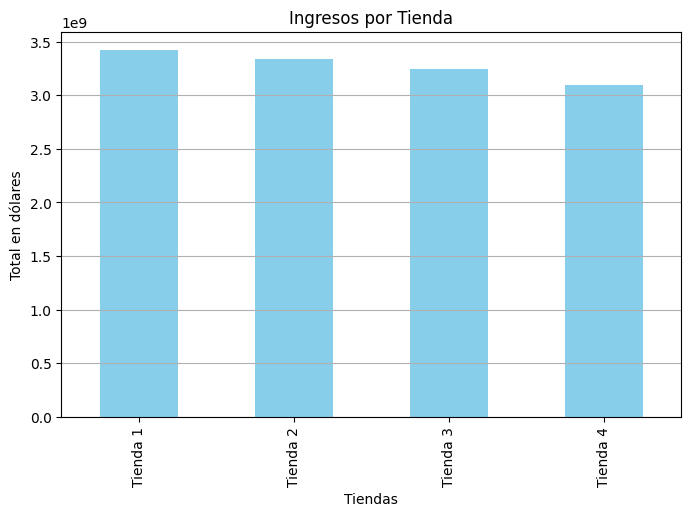


                           GRÁFICO CIRCULAR



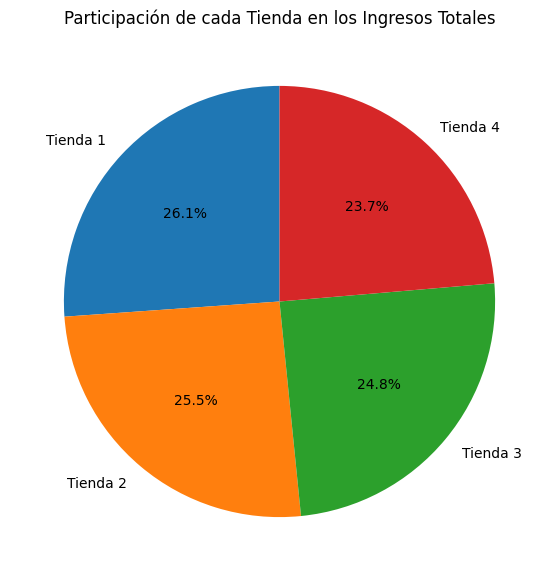


                               GRÁFICO DE CAJA



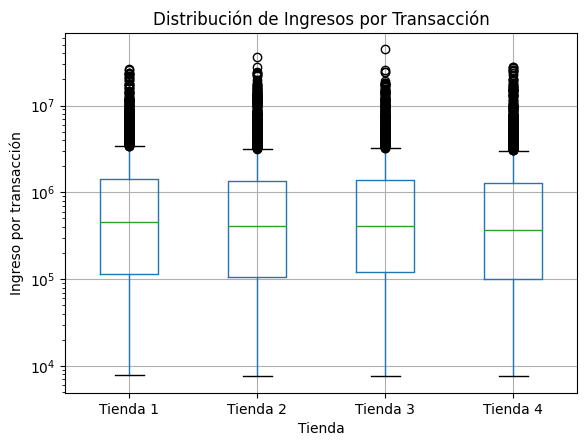

In [127]:
# Gráfico de barras
print(f"\n {'GRÁFICO DE BARRAS':>50}\n")
plt.figure(figsize=(8, 5))
ingresos.plot(kind="bar", color="skyblue", title="Ingresos por Tienda")
plt.ylabel("Total en dólares")
plt.xlabel("Tiendas")
plt.grid(axis="y")
plt.show()

# Gráfico circular
print(f"\n {'GRÁFICO CIRCULAR':>42}\n")
plt.figure(figsize=(7, 7))
ingresos.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participación de cada Tienda en los Ingresos Totales")
plt.ylabel("")
plt.show()

# Gráfico de caja
print(f"\n {'GRÁFICO DE CAJA':>45}\n")
df.boxplot(column="Ingreso", by="tienda")
plt.title("Distribución de Ingresos por Transacción")
plt.suptitle("")
plt.xlabel("Tienda")
plt.ylabel("Ingreso por transacción")
plt.yscale("log")
plt.show()

# 2. Ventas por categoría

In [128]:
# Agrupar por tienda y categoría: suma de unidades vendidas
ventas_categoria = df.groupby(["tienda", "Categoría del Producto"])["Cantidad de cuotas"].sum().reset_index()

# Análisis de ventas por categoría
for tienda in ventas_categoria["tienda"].unique():
    top_categoria = ventas_categoria[ventas_categoria["tienda"] == tienda].sort_values("Cantidad de cuotas", ascending=False).iloc[0]
    print(f"- En la {tienda}, la categoría más vendida es {top_categoria['Categoría del Producto']}, con un total de {top_categoria['Cantidad de cuotas']:,} unidades.\n")

- En la Tienda 1, la categoría más vendida es Muebles, con un total de 1,446 unidades.

- En la Tienda 2, la categoría más vendida es Electrónicos, con un total de 1,333 unidades.

- En la Tienda 3, la categoría más vendida es Muebles, con un total de 1,408 unidades.

- En la Tienda 4, la categoría más vendida es Muebles, con un total de 1,392 unidades.



#Gráficos para visualización de Ventas por categoría


                                                    GRÁFICO BARRAS AGRUPADAS



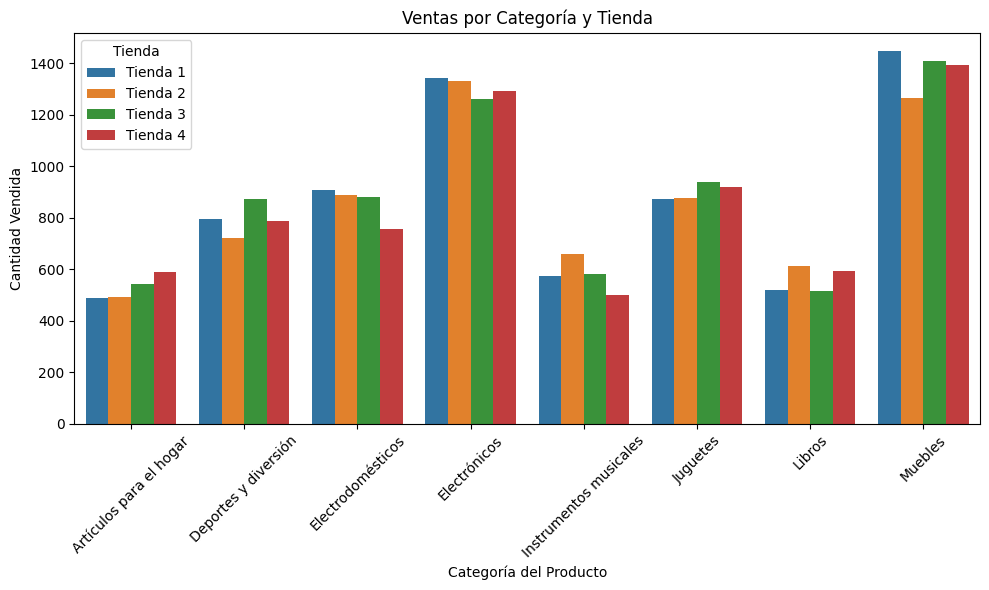


                                                    GRÁFICO BARRAS APILADAS



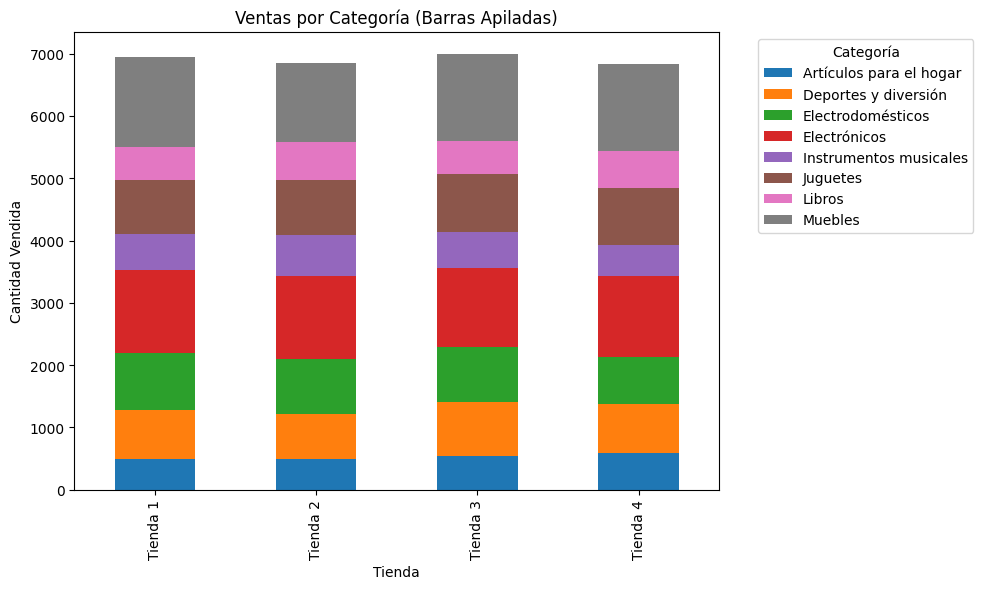


                                   GRÁFICO CIRCULAR



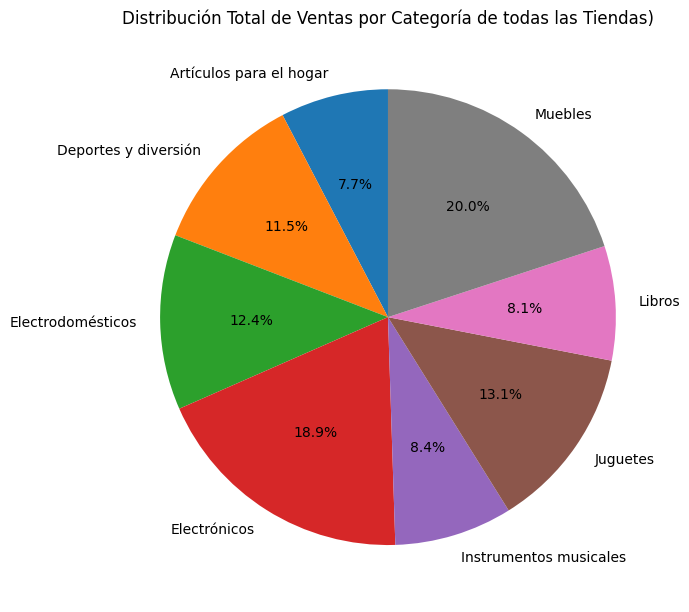

In [131]:
# gráfico barras agrupadas
print(f"\n {'GRÁFICO BARRAS AGRUPADAS':>75}\n")
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria, x="Categoría del Producto", y="Cantidad de cuotas", hue="tienda")
plt.title("Ventas por Categoría y Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# gráfico barras apiladas
ventas_apiladas = df.groupby(["tienda", "Categoría del Producto"])["Cantidad de cuotas"].sum().unstack().fillna(0)
ventas_apiladas.plot(kind="bar", stacked=True, figsize=(10, 6))
print(f"\n {'GRÁFICO BARRAS APILADAS':>74}\n")
plt.title("Ventas por Categoría (Barras Apiladas)")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# gráfico circular
ventas_totales_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum()
print(f"\n {'GRÁFICO CIRCULAR':>50}\n")
plt.figure(figsize=(7, 7))
ventas_totales_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribución Total de Ventas por Categoría de todas las Tiendas)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [134]:
# Calificación promedio por tienda
calificaciones = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:\n")
print(f"{'Tienda':<10} | {'Calificación Promedio'}")
print("-" * 38)

for tienda, prom in calificaciones.items():
    print(f"{tienda:<10} | {prom:>20.2f}")

mejor = calificaciones.idxmax()
peor = calificaciones.idxmin()

print(f"\n* La tienda mejor valorada es la {mejor}, con un promedio de {calificaciones.max():.2f}.\n")
print(f"* La tienda con menor calificación es la {peor}, con un promedio de {calificaciones.min():.2f}.")

Calificación promedio por tienda:

Tienda     | Calificación Promedio
--------------------------------------
Tienda 3   |                 4.05
Tienda 2   |                 4.04
Tienda 4   |                 4.00
Tienda 1   |                 3.98

* La tienda mejor valorada es la Tienda 3, con un promedio de 4.05.

* La tienda con menor calificación es la Tienda 1, con un promedio de 3.98.


#Gráficos para visualización de Calificación promedio de la tienda


                                        GRÁFICO DE BARRAS



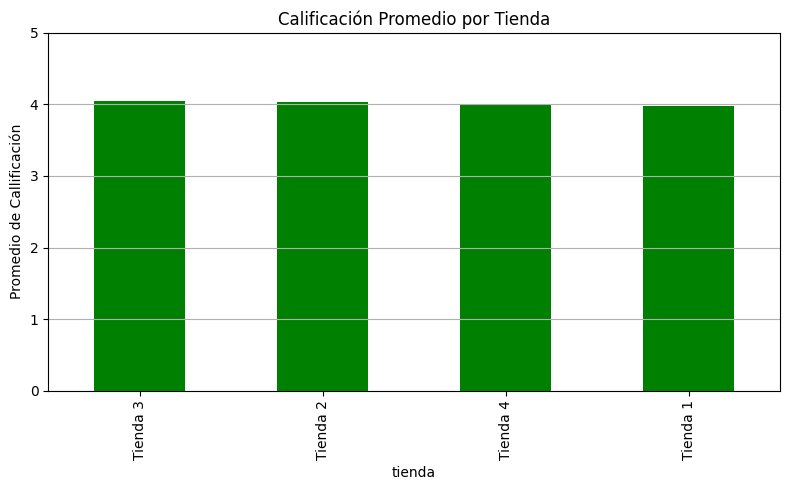


                                                        GRÁFICO DE CAJA



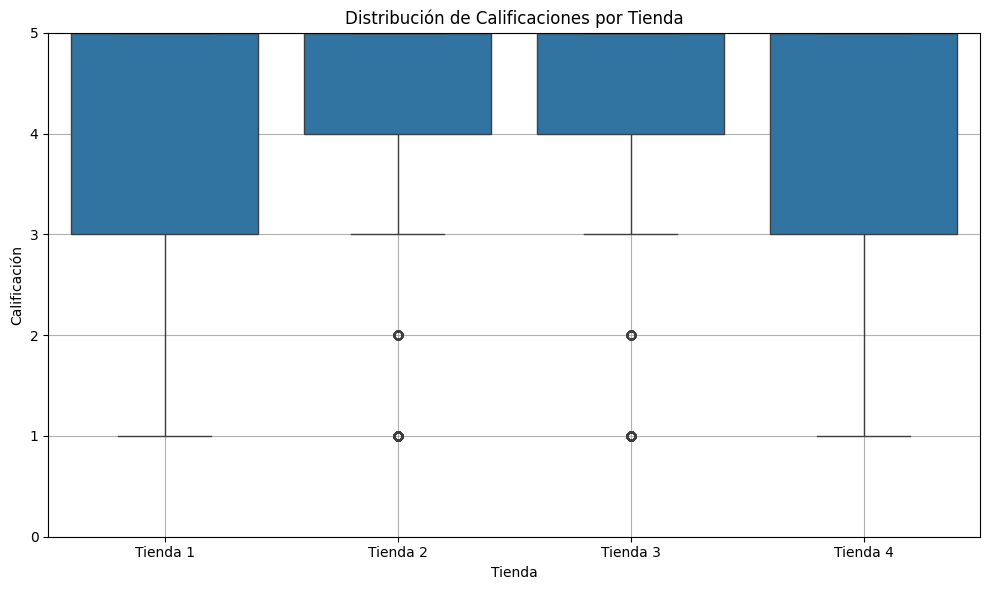


                                        GRÁFICO DE DISPERSIÓN



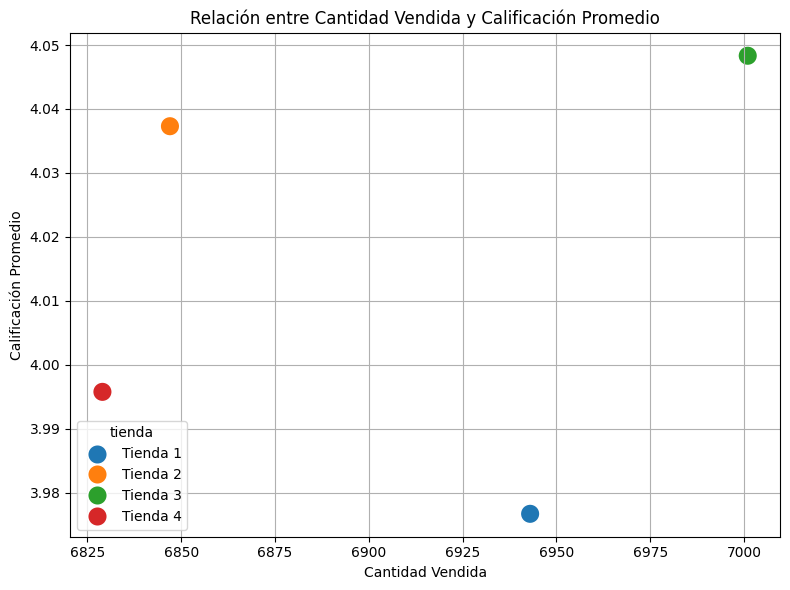

In [149]:
# gráfico de barras
print(f"\n {'GRÁFICO DE BARRAS':>56}\n")
plt.figure(figsize=(8, 5))
calificaciones.plot(kind="bar", color="green")
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Promedio de Callificación")
plt.ylim(0, 5)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# grafico de caja
print(f"\n {'GRÁFICO DE CAJA':>70}\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tienda", y="Calificación")
plt.title("Distribución de Calificaciones por Tienda")
plt.ylim(0, 5)
plt.ylabel("Calificación")
plt.xlabel("Tienda")
plt.grid(True)
plt.tight_layout()
plt.show()

# gráfico de dispersión
ventas_y_reseñas = df.groupby("tienda").agg({
    "Cantidad de cuotas": "sum",
    "Calificación": "mean"
}).reset_index()
print(f"\n {'GRÁFICO DE DISPERSIÓN':>60}\n")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ventas_y_reseñas, x="Cantidad de cuotas", y="Calificación", hue="tienda", s=200)
plt.title("Relación entre Cantidad Vendida y Calificación Promedio")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Calificación Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda